<a href="https://colab.research.google.com/github/gabrielsuper/projetosdata/blob/main/Projeto_AIRBNB_Porto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados da Airbnb - Porto

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Porto que se situa em Portugal, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos dados

Todos os dados utilizados neste notebook foram retirados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

Para esta análise exploratória referente a cidade do Porto iremos utilizar o arquivo abaixo:

* `listing.csv` - *Summary information and metrics for listings in Porto (good for visualisations).*

In [2]:
# importar os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um dataframe

df = pd.read_csv('http://data.insideairbnb.com/portugal/norte/porto/2021-02-13/visualisations/listings.csv')

## Análise dos dados
 
 Esta etapa tem como objetivo criar uma consisciência situacional inicial e permitir um entendimento de como os dados estão estruturados e organizados.

**Dicionário das variáveis**

* `id` - número da id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciarmos qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,75,5,17,2018-09-28,0.18,1,222
1,42462,Large Penthouse in Vila Nova Gaia,185492,Gabriela,VILA NOVA DE GAIA,Mafamude e Vilar do Paraíso,41.10739,-8.59430,Entire home/apt,73,30,39,2018-10-14,0.39,3,166
2,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-09-07,0.21,3,0
3,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.11,3,0
4,76436,Go2oporto @ River Side,399503,Go2oporto,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.13951,-8.61453,Entire home/apt,137,2,184,2020-08-13,1.63,13,358


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Esse *dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listing.csv`. Existe uma versão mais completa acima de 11128 entradas e 106 variáveis, o arquivo se encontra com o nome (`listings.csv.gz`).


In [7]:
# identificar o volume da dados do DataFrame

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset

display(df.dtypes)

Entradas:	 11128
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a procentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* As variáveis `reviews_per_month` e `last_review` possuem 18,33% dos seus valores nulos.
* As variáveis `name` e `host_name` têm abaixo de 0,1% dos valores nulos.


In [12]:
# ordernar em ordem decrescente as variáveis por seus valores ausentes

((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))

reviews_per_month                 0.183321
last_review                       0.183321
host_name                         0.000359
name                              0.000090
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, irei plotar o histograma.

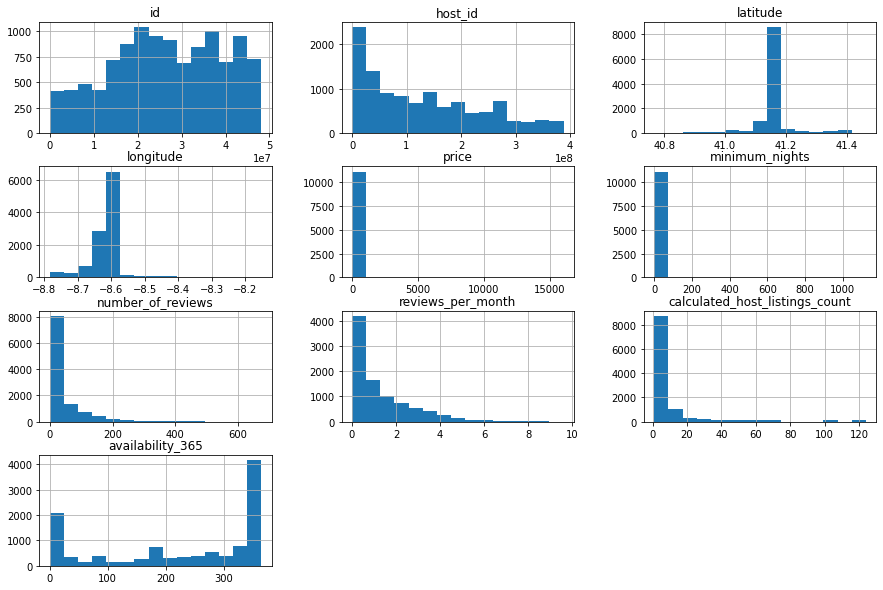

In [19]:
# plotar o histograma das variáveis numéricas

df.hist(bins= 15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*, Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica.
Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variavel.

In [22]:
# ver o resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11128.000000,11128.00000,11128.000000,9088.000000,11128.000000,11128.000000
mean,78.373113,3.12518,41.500090,1.267349,10.317937,226.730050
std,297.711681,15.87678,69.412309,1.361272,20.100679,141.392307
min,8.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,35.000000,1.00000,1.000000,0.230000,1.000000,89.000000
50%,52.000000,2.00000,12.000000,0.740000,4.000000,278.000000
75%,75.000000,2.00000,51.000000,1.900000,8.000000,361.000000
max,16042.000000,1123.00000,675.000000,9.610000,124.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 75, porém seu valor máximo é 16042.
* A quantidade mínima de noites (`minimus_nights`) está acima de 365 dias no ano.

###Boxplot para minimum_nights

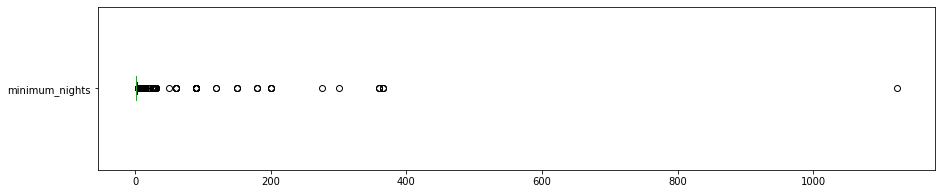

minimum_nights: valores acima de 30:
47 entradas
0.4224%


In [23]:
# minimum_nights

df.minimum_nights.plot(kind= 'box', vert= False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0] *100)))

###Boxplot para price

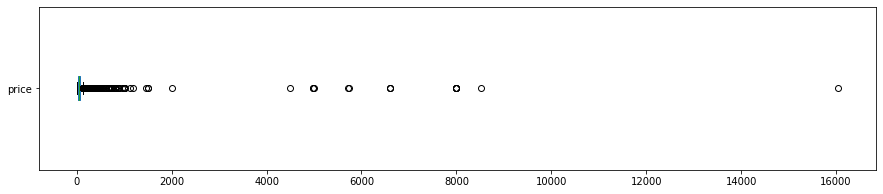


price: valores acima de 1500
17 entradas
0.1528%


In [25]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))


#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

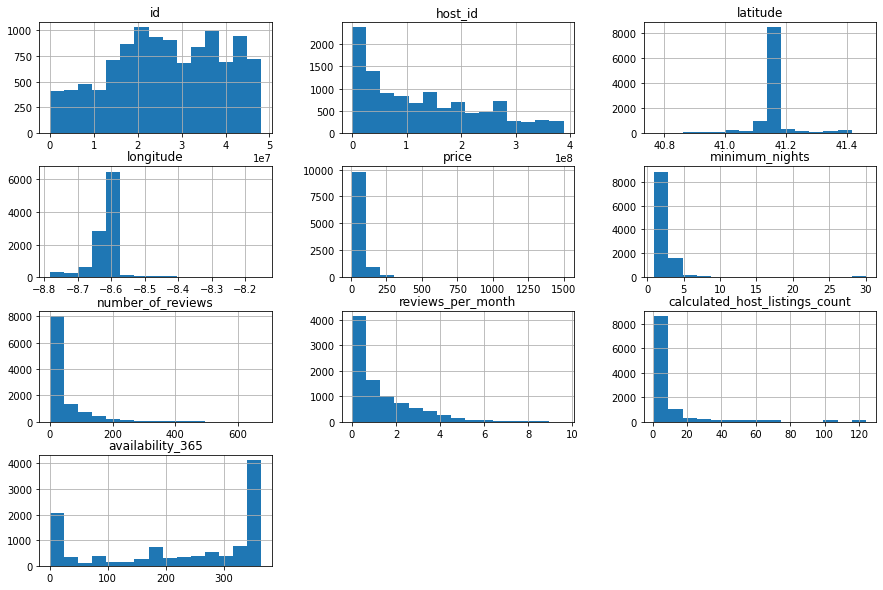

In [33]:
# remover os outliers em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));


###Q.5 Qual a correlação existente entre as variáveis?

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Cria uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [35]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.009861,-0.104845,-0.151825,-0.025125,0.037312
minimum_nights,-0.009861,1.000000,-0.009263,-0.060391,-0.055439,-0.046559
number_of_reviews,-0.104845,-0.009263,1.000000,0.827209,-0.066730,0.013662
reviews_per_month,-0.151825,-0.060391,0.827209,1.000000,-0.011914,0.052259
calculated_host_listings_count,-0.025125,-0.055439,-0.066730,-0.011914,1.000000,0.076406
availability_365,0.037312,-0.046559,0.013662,0.052259,0.076406,1.000000


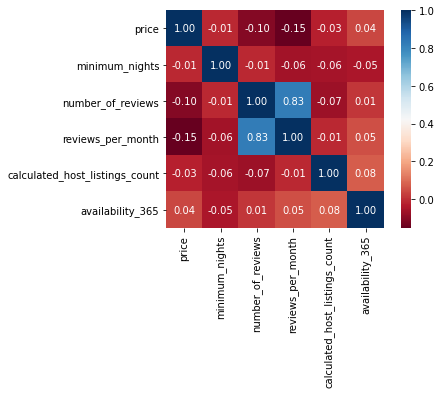

In [38]:
sns.heatmap(corr, cmap= 'RdBu', fmt= '.2f', square= True, linecolor= 'white', annot= True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de aparatamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a qantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`

In [39]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    8559
Private room       2174
Hotel room          200
Shared room         131
Name: room_type, dtype: int64

In [44]:
# mostrar a porcentagem de cada tipo de imóvel disponível

(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    77.359002
Private room       19.649313
Hotel room          1.807664
Shared room         1.184020
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros *(neighbourhoods)* a partir do preço de locação.

In [45]:
df_clean. groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Negrelos (São Tomé)                 450.000000
Cristelo                            300.000000
Vila Nova do Campo                  266.000000
Recarei                             250.000000
Água Longa                          237.500000
Tropeço                             216.666667
Alvarenga                           211.300000
Sandim, Olival, Lever e Crestuma    202.611111
Melres e Medas                      200.769231
Covelas                             200.000000
Name: price, dtype: float64

Acima, vemos que bairros como Negrelos (São Tomé), Cristelo e Vila Nova, estão com média de preço superior a lugares como Recarei, Água Longa e Tropeço.

Uma pessoa que não conhecesse o Porto poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Negrelos.

In [52]:
# ver quantidade de imóveis no Negrelos (São Tomé)

print(df_clean[df_clean.neighbourhood == "Negrelos (São Tomé)"].shape)

# ver a única entrada do Negrelos (São Tomé)

df_clean[df_clean.neighbourhood == "Negrelos (São Tomé)"]

(1, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6167,28651817,"Casa fantástica com história, charme e privaci...",24480387,Clara,SANTO TIRSO,Negrelos (São Tomé),41.34686,-8.4113,Entire home/apt,450,3,3,2020-07-31,0.17,1,285


Como são forncedidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto.
Para isso, considera-se `x=longitudes` e `y=latitude`

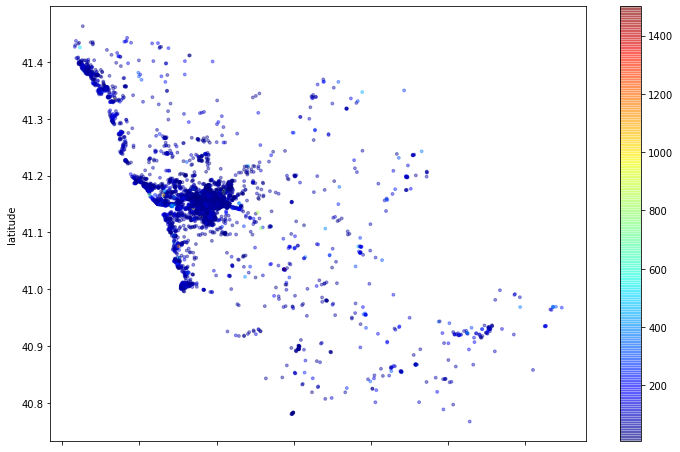

In [50]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatística de alguns atributos.

Por fim, lembra-se que este *dataset* é uma ver~soa resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos com 106 variáveis disponíveis.